<a href="https://colab.research.google.com/github/AdilPasha2/CODSOFT/blob/main/Task4_SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('spam.csv', encoding='latin-1') # try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'ISO-8859-1' or 'cp1252'

In [61]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [63]:
df.shape

(5572, 5)

In [64]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [65]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True) # drop v3, v4, v5

In [66]:
df.rename(columns={'v1': 'spam', 'v2': 'message'}, inplace=True) # renames v1 and v2 into 'spam' and 'message' columns

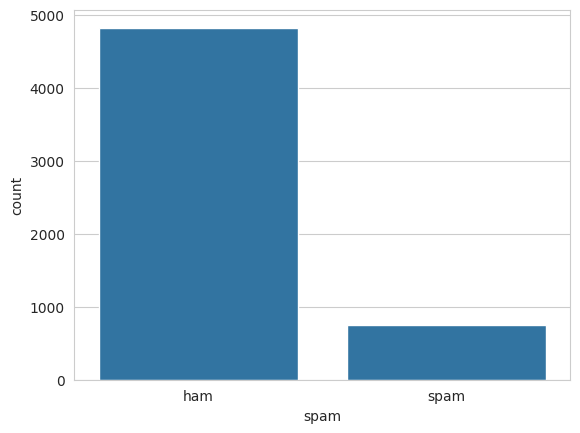

In [67]:
sns.set_style('whitegrid')
sns.countplot(df,x='spam');

In [68]:
df.duplicated().sum()

403

In [69]:
df.drop_duplicates(inplace=True)

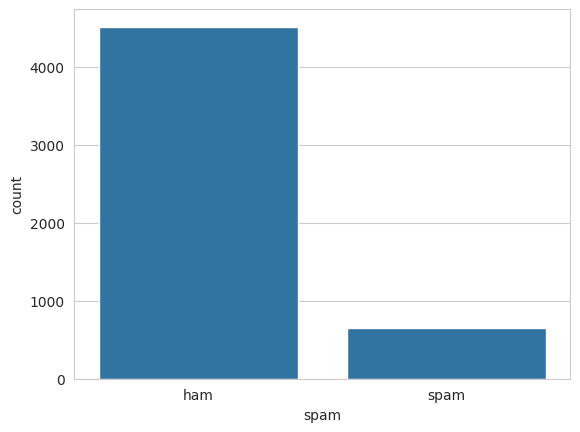

In [70]:
sns.set_style('whitegrid')
sns.countplot(df,x='spam');

In [71]:
    df['spam'] = np.where(df['spam'] == 'ham', 0, 1) # turn target column into numerical values
    df.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


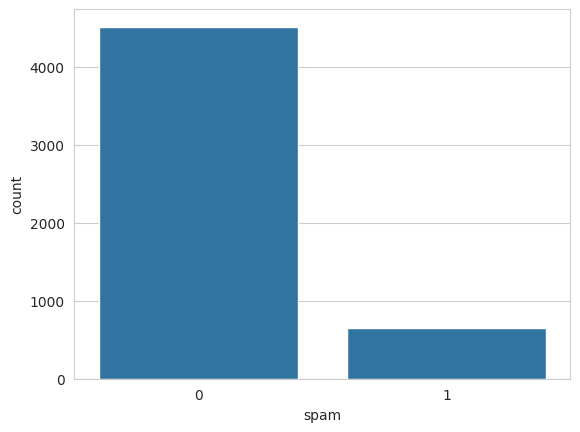

In [72]:
sns.set_style('whitegrid')
sns.countplot(df,x='spam');

In [73]:

import string # import the string module

punctuation_list = string.punctuation

def remove_punctation(text):
    """Removes punctuation"""
    temp = str.maketrans('', '', punctuation_list)
    return text.translate(temp)

df['message'] = df['message'].apply(remove_punctation)
df.head()

,spam,message
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


In [74]:
!pip install nltk # install the nltk module
import nltk # import nltk
nltk.download('stopwords') # download the stopwords corpus
from nltk.corpus import stopwords # import the stopwords object from nltk.corpus

def remove_stop_words(text):
    """Remoes stop words from text"""
    stop_words = stopwords.words('english')
    important_words = []
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            important_words.append(word)

    output = ' '.join(important_words)
    return output

df['message'] = df['message'].apply(remove_stop_words)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,spam,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [75]:
punctuation_list = string.punctuation

def remove_punctation(text):
    """Removes punctuation"""
    temp = str.maketrans('', '', punctuation_list)
    return text.translate(temp)

df['message'] = df['message'].apply(remove_punctation)
df.head()

,spam,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


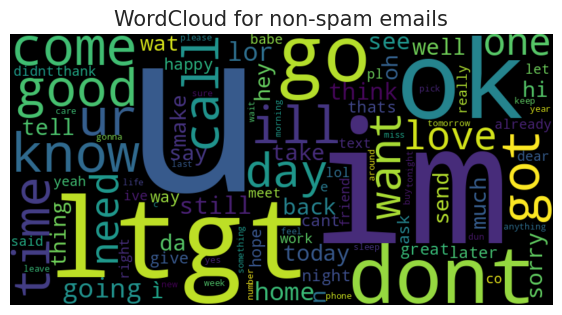

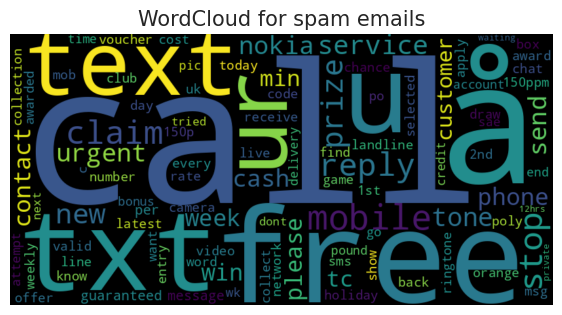

In [76]:
!pip install wordcloud matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(df, typ):
    """Plots visalization of most common words in text based on its type"""
    email_corpus = ' '.join(df['message'])

    # Check if email_corpus is empty
    if not email_corpus.strip():
        print(f"No words found for {typ} emails. Cannot generate WordCloud.")
        return

    plt.figure(figsize=(7, 7))
    word_cloud = WordCloud(background_color='black',
                           max_words=100,
                           width=800,
                           height=400,
                           collocations=False).generate(email_corpus)
    plt.imshow(word_cloud, interpolation='bilinear'),
    plt.title(f'WordCloud for {typ} emails', fontsize=15),
    plt.axis('off'),
    plt.show()

plot_word_cloud(df[df['spam'] == 0], 'non-spam')
plot_word_cloud(df[df['spam'] == 1], 'spam')

In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(df['message'],df['spam'],test_size=0.2,random_state=42)

tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train) # create custom token for our data

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

train_sequences = pad_sequences(train_sequences,  maxlen=100, padding='post',truncating='post')
test_sequences = pad_sequences(test_sequences,  maxlen=100,padding='post',truncating='post')

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense


model = Sequential([ # simplest sequentioal model
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=100), # with embedding layer (input)
    GlobalAveragePooling1D(), # 2 hidden layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # and 1 output layer -> will give us either 1 or 0
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(patience=5, # early stopping will stop model training when we don't have major changes in evaluation (will wait 5 same scores before stopping)
                   monitor='val_accuracy', restore_best_weights=True)


lr = ReduceLROnPlateau(patience=4, # will adjust learning rate based on loss value
                       monitor='val_loss',factor=0.5, verbose=0)

In [85]:
history = model.fit(train_sequences, y_train, epochs=30, batch_size=64, validation_data=(test_sequences, y_test), callbacks=[es, lr])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8205 - loss: 0.4528 - val_accuracy: 0.8598 - val_loss: 0.3881 - learning_rate: 0.0010
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8810 - loss: 0.3456 - val_accuracy: 0.8598 - val_loss: 0.3877 - learning_rate: 0.0010
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8721 - loss: 0.3604 - val_accuracy: 0.8598 - val_loss: 0.3886 - learning_rate: 0.0010
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8667 - loss: 0.3682 - val_accuracy: 0.8598 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8813 - loss: 0.3377 - val_accuracy: 0.8598 - val_loss: 0.3773 - learning_rate: 0.0010
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8793 - loss: 0.3364 - val_accuracy: 0.8598 - val_loss: 0.3707 - learning_rate: 0.0010


In [87]:
test_loss, test_accuracy = model.evaluate(test_sequences, y_test)
print('Test Loss :', test_loss)
print('Test Accuracy :', test_accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.4053
Test Loss : 0.3880697786808014
Test Accuracy : 0.8597679138183594
